In [ ]:
from notebooks import *
sg.init(app=None)

In [ ]:
# TODO def xc_similar_html(xc_id: int) -> pd.DataFrame:
xc_id = 414174
quality = ['A', 'B']
n_sp = 5
n_recs_r = 50
n_total = 25
thumb_s = 1.5
audio_s = 10
scale = 2

In [ ]:
query_rec = (sg.xc_meta
    [lambda df: df.id == xc_id]
    .pipe(recs_featurize_metadata)
    .pipe(recs_featurize_audio)
    .pipe(recs_featurize_feat)
    .pipe(lambda df: one(df_rows(df)))
)
query_rec.to_frame()

In [ ]:
query_probs = (
    rec_probs(query_rec, sg.search)
    [:n_sp]
)
query_probs

In [ ]:
# memory.log.level = 'debug'  # TODO Nontrivial number of cache misses slowing us down -- why are there misses?
search_recs = (sg.xc_meta
    # Filter
    [lambda df: df.species.isin(query_probs.species)]
    [lambda df: df.quality.isin(quality)]
    .pipe(df_remove_unused_categories)
    # Sample n_recs_r per species
    .groupby('species').apply(lambda g: (g
        .sample(n=n_recs_r)  # TODO HACK Sample to make go faster, until we build up a full cache
    ))
    .reset_index(level=0, drop=True)  # species, from groupby
    # Featurize
    .pipe(recs_featurize_metadata)
    .pipe(recs_featurize_audio)
    .pipe(recs_featurize_feat)
    # Include query_rec in results (already featurized)
    .pipe(lambda df: df if query_rec.name in df.index else pd.concat([
        DF([query_rec]).pipe(df_set_index_name, 'xc_id'),  # Restore index name, lost by df->series->df
        df,
    ]))
)
display(
    search_recs.species.value_counts(),
    search_recs[:10],
)

In [ ]:
result_recs = (
    rec_neighbors_by(
        query_rec=query_rec,
        search_recs=search_recs if query_rec.name in search_recs.index else pd.concat([
            DF([query_rec]).pipe(df_set_index_name, 'xc_id'),  # HACK Force compat with xc_recs, e.g. if from user_recs
            search_recs,
        ]),
        by=Search.X,  # TODO Add user control to toggle dist function
    )
    # .groupby('species').apply(lambda g: (g
    #     .sort_values('dist', ascending=True)
    #     [:n_recs]  # TODO Restore n_recs later, maybe after we've built enough cache to no longer need n_recs_r
    # ))
    # .reset_index(level=0, drop=True)  # species, from groupby
    .sort_values('dist', ascending=True)
    [:n_total]
    .drop(columns=['feat'])
)
display(
    result_recs.species.value_counts(),
    result_recs[['dist', 'species']][:10],
)

[18:11:02.774] INFO   [3/3 slowest] Featurizing xc_raw_recs -> xc_recs (.audio, .feat, .spectro)...

[18:11:02.776] DEBUG  Features.spectros:in

  len(recs): 25

  len(recs) per dataset: {xc: 25}

  sum(duration_h): 0.472

  sum(samples_mb): 71.5

  sum(samples_n): 37465879

spectro: [

] |   0% Completed |  0.0s

spectro: [

###################################################################################

] | 100% Completed |  0.1s

[18:11:02.907] DEBUG  Features.spectros:out

  (f, sum(t)): [40, 146317]

plot_thumb.many: [

] |   0% Completed |  0.0s

plot_thumb.many: [

#######                                                                    

] |  10% Completed |  0.1s

plot_thumb.many: [

##################                                                         

] |  24% Completed |  0.4s

plot_thumb.many: [

#####################                                                      

] |  28% Completed |  0.6s

plot_thumb.many: [

###########################                                                

] |  36% Completed |  1.4s

plot_thumb.many: [

##############################                                             

] |  40% Completed |  2.1s

plot_thumb.many: [

#################################                                          

] |  44% Completed |  2.4s

plot_thumb.many: [

#################################                                          

] |  44% Completed |  2.5s

plot_thumb.many: [

#########################################################                  

] |  76% Completed |  2.6s

plot_thumb.many: [

###########################################################################

] | 100% Completed |  2.8s

plot_spectro_micro.many: [

] |   0% Completed |  0.0s

plot_spectro_micro.many: [

] |   0% Completed |  0.1s

plot_spectro_micro.many: [

##############                                                     

] |  22% Completed |  0.3s

plot_spectro_micro.many: [

########################                                           

] |  36% Completed |  0.4s

plot_spectro_micro.many: [

##################################                                 

] |  52% Completed |  0.6s

plot_spectro_micro.many: [

##########################################                         

] |  64% Completed |  0.8s

plot_spectro_micro.many: [

########################################################           

] |  84% Completed |  0.9s

plot_spectro_micro.many: [

#############################################################      

] |  92% Completed |  1.0s

plot_spectro_micro.many: [

###################################################################

] | 100% Completed |  1.1s

dist                                                                                           xc_id                                                                                      similar                                                                                                  com_name                                                                                   species quality                                                      thumb                                                      micro  duration_s month_day                                                                                                                                                 background_species                                                                            place                                                                                                                                                                                                  remarks
0    0.000  \n                    <a href="https://www.xeno-canto.org/414174">414174</a>\n                  \n                    <a href="/recs/xc/similar?xc_id=414174">similar</a>\n                            \n                    <a href="/recs/xc/species?species=HOWR">House Wren</a>\n                  \n                    <a href="/recs/xc/species?species=HOWR">HOWR</a>\n                       A  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_display(value=<IPython.core.display.HTML object>)      23.771     01-29                                                                                                                                                                                          Santa Rita do Novo Destino, Goiás, Chácara Jayrson, Brazil                                                                                                                                                                                                         
1   40.491  \n                    <a href="https://www.xeno-canto.org/247381">247381</a>\n                  \n                    <a href="/recs/xc/similar?xc_id=247381">similar</a>\n                            \n                    <a href="/recs/xc/species?species=HOWR">House Wren</a>\n                  \n                    <a href="/recs/xc/species?species=HOWR">HOWR</a>\n                       B  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_display(value=<IPython.core.display.HTML object>)      72.255     05-28                                                                                                                                                                                                    Belo Oriente, Belo Oriente, Minas Gerais, Brazil                                                                                                                                                                                                         
2   44.320  \n                    <a href="https://www.xeno-canto.org/255974">255974</a>\n                  \n                    <a href="/recs/xc/similar?xc_id=255974">similar</a>\n                         \n                    <a href="/recs/xc/species?species=HOSP">House Sparrow</a>\n                  \n                    <a href="/recs/xc/species?species=HOSP">HOSP</a>\n                       B  df_cell_display(value=<IPython.core.display.HTML object>)  df_cell_display(value=<IPython.core.display.HTML object>)     168.015     07-02                                                                                                                                                                           Azores, São Miguel Island, Povoação, Nossa Senhora dos Remédios, Portugal                                                                                                                                                                     A fledgeling calling from the ground
3   44.376  \n                    <a href="https:/
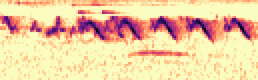
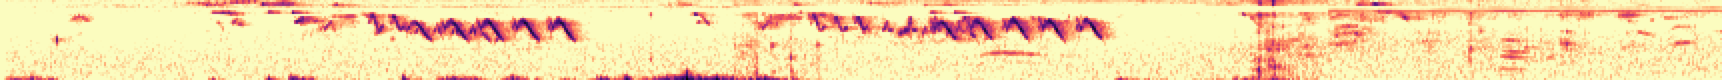
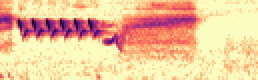
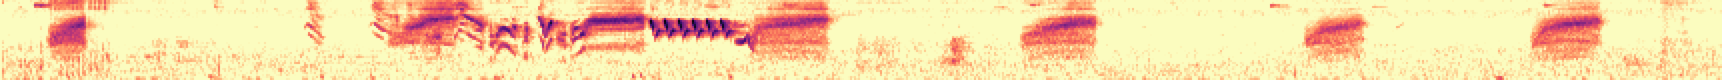
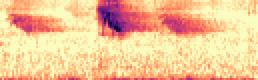
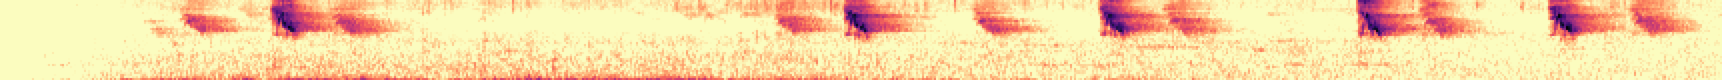
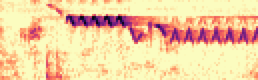
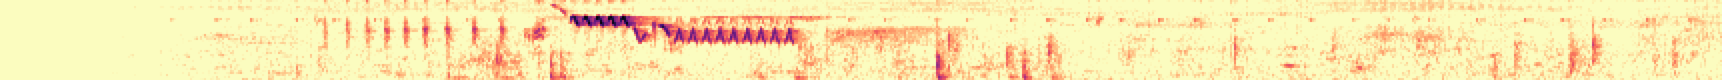
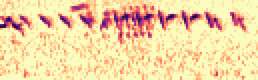
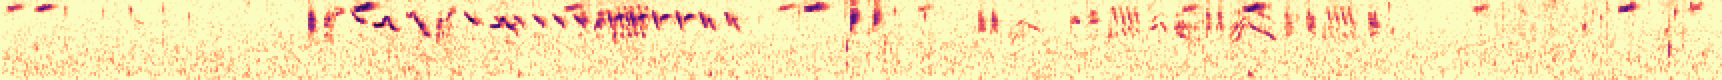
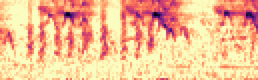
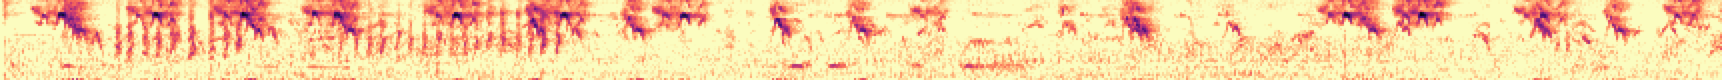
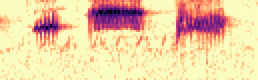
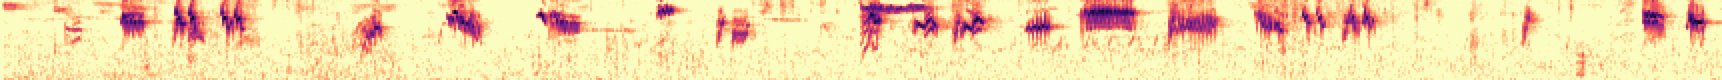
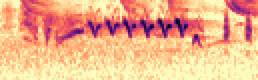
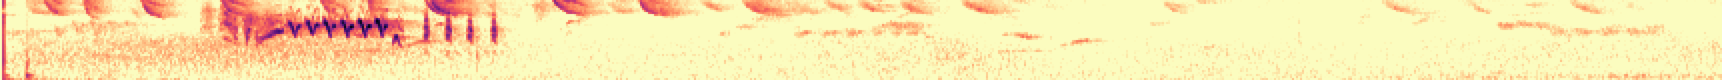
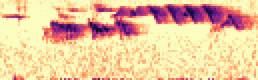
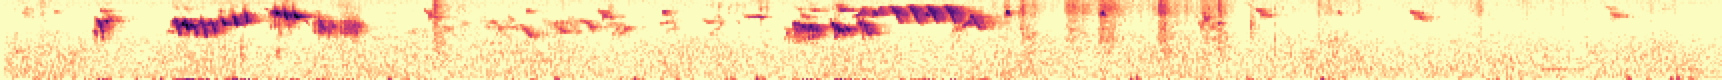
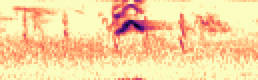
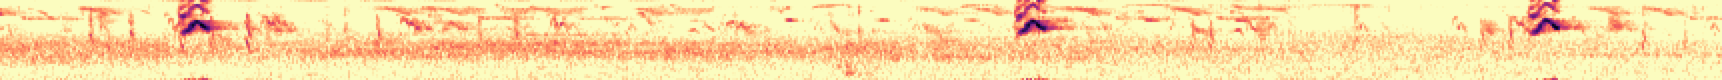
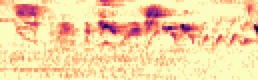
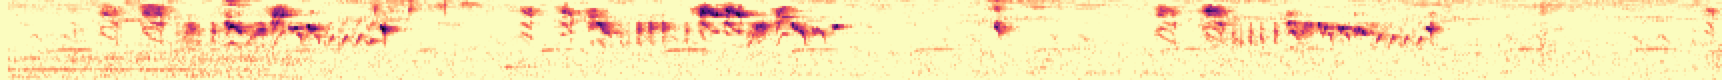
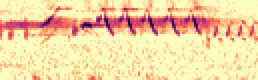
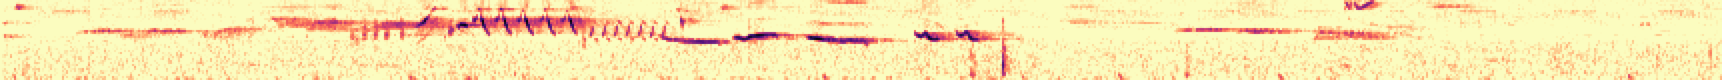
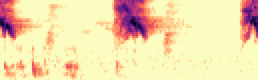
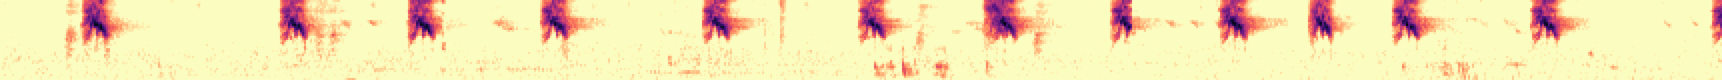
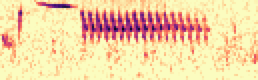
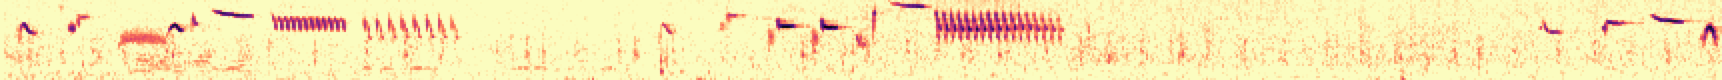
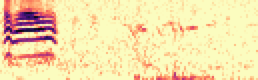
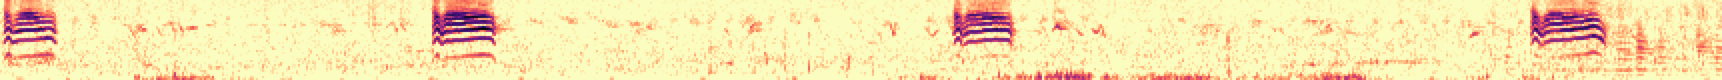
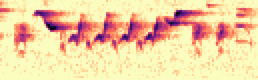
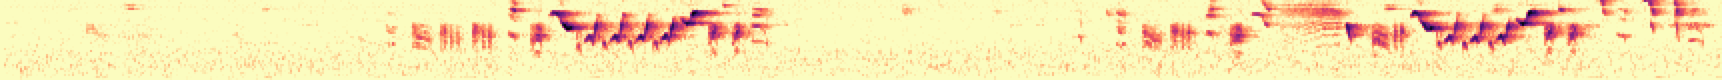
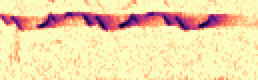
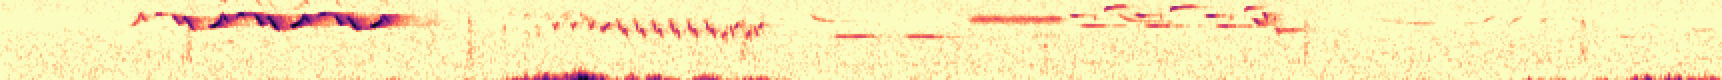
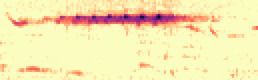
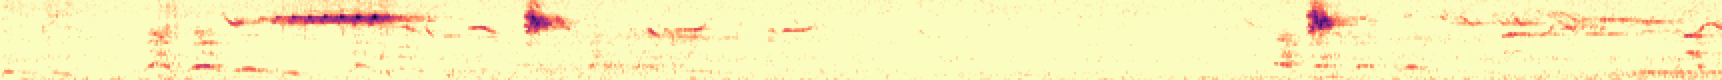
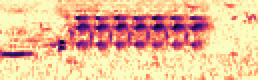
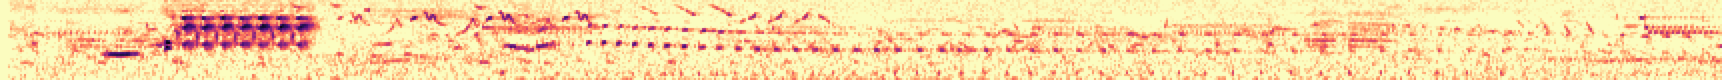
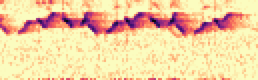
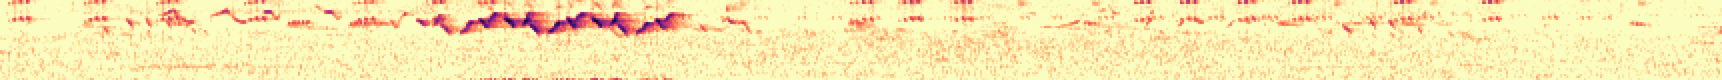
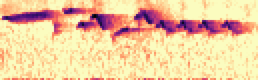
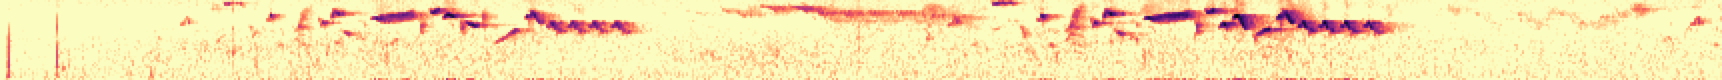
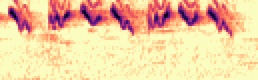
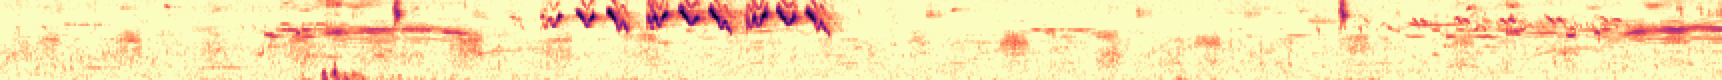
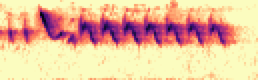
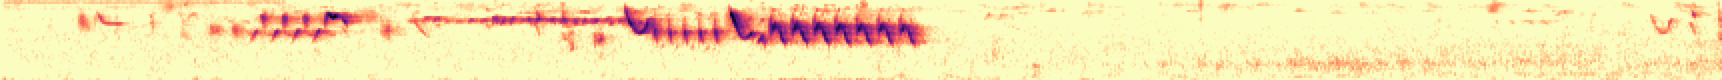
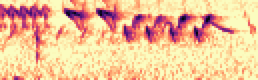
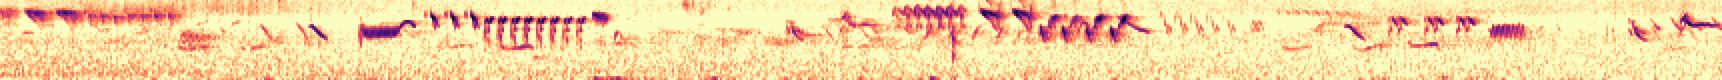
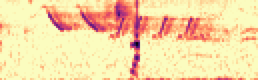
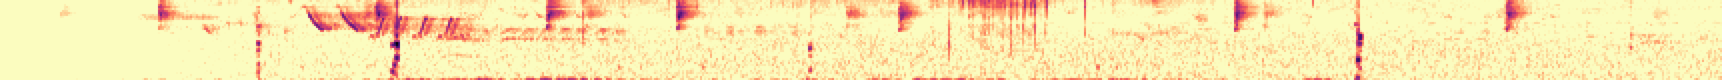

In [ ]:
(result_recs
    .reset_index()
    .pipe(recs_featurize_spectro)
    .pipe(recs_featurize_micro_thumb, thumb_s=thumb_s, audio_s=audio_s, scale=scale)
    .pipe(recs_view)
    [lambda df: [c for c in [
        'dist',
        'xc_id', 'similar', 'com_name', 'species', 'quality',
        'thumb', 'micro',
        'duration_s', 'month_day', 'background_species', 'place', 'remarks',
    ] if c in df]]
)